ma méthode 1 étant plus rapide, on va l'utiliser pour générer la suite

In [1]:
from time import time

def look_and_say(n):
    """Generate the look-and-say sequence up to term n.
    Returns a list of sequence members and elapsed times.
    ex : look_and_say_1(5)
    ([[1], [1, 1], [2, 1], [1, 2, 1, 1], [1, 1, 1, 2, 2, 1]], [0, 0.0, 0.0, 0.0, 0.0])
    """
    sequence = [[1]]
    elapsed = [0]
    start = time()

    for i in range(n-1):
        next_elem = []
        run_val = sequence[i][0]
        run_len = 1
        
        # loop through rest of sequence with dummy value at end
        for val in sequence[i][1:] + [-1]:
            if val != run_val:
                next_elem.extend([run_len, run_val])
                run_len = 1
                run_val = val
            else:
                run_len += 1

        sequence.append(next_elem)
        elapsed.append(time() - start)

    return sequence, elapsed

## prop 2 : λ ∼ 1.303577269034...

In [35]:
n = 70
sequence, elapsed = look_and_say(n)
indicies = [i + 1 for i in range(n)]

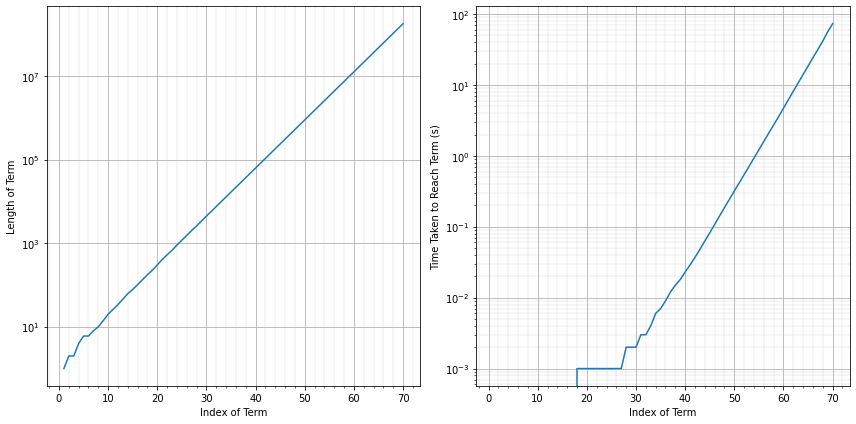

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


axs[0].plot(indicies, [len(term) for term in sequence])
axs[0].set_xlabel('Index of Term')
axs[0].set_ylabel('Length of Term')

axs[0].ticklabel_format(style='plain', useLocale=False, axis='y')
axs[0].get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))
axs[0].set_yscale('log')
axs[0].grid()
axs[0].minorticks_on()
axs[0].grid(which='minor', linestyle='-', linewidth=.2)

axs[1].plot(indicies, elapsed)
axs[1].set_xlabel('Index of Term')
axs[1].set_ylabel('Time Taken to Reach Term (s)')
axs[1].set_yscale('log')
axs[1].grid()
axs[1].minorticks_on()
axs[1].grid(which='minor', linestyle='-', linewidth=.2)

fig.patch.set_facecolor('white')
fig.tight_layout();

# on pourra aussi travailer directement sur la suite des rapport

In [4]:
# transfert de la liste dans un fichier

n = 50
sequence, elapse  = look_and_say(n)

a = "\n"

file = open("conway.txt", 'w')
file.write(f"terme temps\n")

for i in range(n):
    b = ''.join(map(str, sequence[i]))
    file.write(f"{int(b)} {elapse[i]}{a}")
file.close()

#fichier = open("conway.txt", "r")
#print(fichier.read())
#fichier.close()

# construction de la base bdd avec le fichier txt
import pandas as pd

conway_bdd = pd.read_csv("conway.txt", sep = " ")
#print(conway_bdd)
#print(conway_bdd.dtypes)

In [5]:
#import pandas as pd

conway_bdd = pd.read_csv("conway.txt", sep = " ")
del(conway_bdd['temps'])
conway_bdd['l_n']=0

for i in range(conway_bdd['terme'].size-1):
    conway_bdd.iloc[i, 1] = len(conway_bdd.iloc[i+1, 0])/len(conway_bdd.iloc[i, 0])
    
conway_bdd.iloc[conway_bdd['terme'].size-1, 1] = 'NaN'

conway_bdd

,terme,l_n
0,1,2.0
1,11,1.0
2,21,2.0
3,1211,1.5
4,111221,1.0
5,312211,1.333333
6,13112221,1.25
7,1113213211,1.4
8,31131211131221,1.428571
9,13211311123113112211,1.3
